## Neural Network

构建一个神经网络来认识数字 MNIST。 


In [32]:
### 初始化加载库
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### 1. 加载数据 
首先看一下数据长什么样子。这样最直观。


In [65]:
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data ():
    """
        返回: (train_data, val_date, test_data)
    """
    f = gzip.open('./mnist.pkl.gz', 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding='bytes')
    f.close()
    return (train_data, val_data, test_data)

def load_data_wrapper ():
    """
        由于进行数字认识是一个多分类(multi-classifier)问题，
        所以可以对训练数据进行下预处理:
             1. 使样本的特征的 shape 从 (784,) 变成 (784, 1)
             2. 使分类标签变量变成 (10, 1) , 仅针对训练数据。
    """
    train_data, val_data, test_data = load_data()
    train_X = [x.reshape(784, 1) for x in train_data[0]]
    train_y = [vectorize(y) for y in train_data[1]]
    
    val_X = [x.reshape(784, 1) for x in val_data[0]]
    test_X = [x.reshape(784, 1) for x in test_data[0]]
    
    return (
        zip(train_X, train_y), 
        zip(val_X, val_data[1]),
        zip(test_X, test_data[1])
    )

def vectorize(y):
    '''
        返回一个 shape 为 (10, 1) 的 column vector.
    '''
    e = np.zeros((10, 1))
    e[y] = 1.0
    return e
    
def get_images (data):
    images, _ = data
    return [img.reshape(28, -1) for img in images]

def plot_images6 (images):
    "Random plot six MNIST images separately"
    ilist = np.random.permutation(range(len(images)))
    fig = plt.figure()
    for j in range(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(images[ilist[j]], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

In [48]:
train_data, val_data, test_data = load_data()

In [56]:
def printDataInfo(data, name):
    print("\n", name, type(data), len(data))
    X, y = data
    print('X:', type(X), X.shape, X[0].shape)
    print('y:', type(y), y.shape)
    
printDataInfo(train_data, 'train_data')
printDataInfo(val_data, 'val_data')
printDataInfo(test_data, 'test_data')


 train_data <class 'tuple'> 2
X: <class 'numpy.ndarray'> (50000, 784) (784,)
y: <class 'numpy.ndarray'> (50000,)

 val_data <class 'tuple'> 2
X: <class 'numpy.ndarray'> (10000, 784) (784,)
y: <class 'numpy.ndarray'> (10000,)

 test_data <class 'tuple'> 2
X: <class 'numpy.ndarray'> (10000, 784) (784,)
y: <class 'numpy.ndarray'> (10000,)


从上面可以看出，我们的数据集共有 `70,000` 个样本，每一个样本是 `28 * 28 = 784` 个像素所组成的图片。

我们将 `70,000` 个样本分成：

    - 训练数据, training data: 50,000
    - 验证数据, validation data: 10,000
    - 测试数据, test data: 10,000

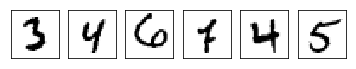

In [57]:
images = get_images(train_data)
plot_images6(images)

### 验证下准备数据

In [74]:
def printData(data, name):
    print("\n", name, type(data))
    X, y = data
    print('X:', type(X), X.shape)
    print('y:', type(y), y.shape)
    
train_data, val_data, test_data = load_data_wrapper()  
# print(type(train_data), train_data[0])
# print(list(train_data))
# printData(train_data, 'train_data')
# printData(val_data, 'val_data')
# printData(test_data, 'test_data')

### 模型构建

In [90]:
"""
实现随机梯度下降版的 NN
"""
import random
import numpy as np

class Network(object):
    
    def __init__(self, sizes):
        '''
            sizes 是 NN 每层的单元数。
            Ex: sizes = [2, 3, 1]
            则说明，NN 共有 3 层，即一个输入层，一个隐藏层和一个输出层，
            每层的单元个数，分别是 2, 3, 1.
            我们为每层的参数进行初始化。
            注意：输入层是没有偏置 bias 参数的。
        '''
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(nLayer, 1) for nLayer in sizes[1:]]
        self.weights = [np.random.randn(nLayer, nPreLayer)
                        for nLayer, nPreLayer in zip(sizes[1:], sizes[:-1])]
        
    def FP(self, a):
        '''
            使用 Feed Forward 将 a 作为输入参数，返回输出层。
        '''
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a
    
    def StochasticGD(self, train_data, epochs, mini_batch_size, alpha
                    test_data = None):
       '''
           使用 mini-batch stochastic gradient descent 来训练模型。
       '''
        if test_data: n_test = len(test_data)
        n = len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k: k + mini_batch_size] 
                            for k range(0, n, mini_batch_size)]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, alpha)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    i, self.evaluate(test_data), n_test
                ))
            else:
                print("Epock {0} complete".format(i))
    
    def update_mini_batch(self, mini_batch, alpha):
        '''
            使用 BP 来更新参数。
        '''
    def BP(self, x, y):
        '''
            实现 BP。返回一个元组 `(Nabla_b, Nabla_w)`
        '''
        
                                        
    

### Miscellaneous functions
def sigmoid(z):
    ''' The sigmoid function '''
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    ''' Derivative of the sigmoid function '''
    return sigmoid(z) * (1 - sigmoid(z))
        

### Delta 与 Nabla
Delta 𝚫 和 Nabla 𝛁 一般都可表示微分符号，一般都称为 Laplace operator。

In [91]:
sizes = [3, 4, 4, 2]
nn = Network(sizes)
X = np.random.randn(3, 1)
print(X[0].shape)

print(X.shape)
nn.FP(X)

(1,)
(3, 1)


array([[0.37811898],
       [0.65908777]])